#Advanced Activation Functions

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Activation, LeakyReLU, PReLU, ELU
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape images to (samples, height, width, channels)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 0s 0us/step


#1. Leaky ReLU (with LeakyReLU)

Leaky ReLU introduces a small negative slope (alpha) for negative inputs to prevent neuron saturation. This helps in avoiding the "dying ReLU" problem where neurons become inactive. The LeakyReLU activation is applied to convolutional and dense layers in the model.



In [ ]:
# Create Leaky ReLU CNN model
model_leaky_relu = Sequential([
    Conv2D(32, (3, 3), activation='linear', input_shape=(28, 28, 1)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='linear'),
    LeakyReLU(alpha=0.1),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_leaky_relu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_leaky_relu.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 28s 64ms/step - loss: 0.2266 - accuracy: 0.9347 - val_loss: 0.0772 - val_accuracy: 0.9788
Epoch 2/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0710 - accuracy: 0.9791 - val_loss: 0.0559 - val_accuracy: 0.9837
Epoch 3/10
422/422 [==============================] - 27s 63ms/step - loss: 0.0476 - accuracy: 0.9859 - val_loss: 0.0498 - val_accuracy: 0.9888
Epoch 4/10
422/422 [==============================] - 26s 62ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0504 - val_accuracy: 0.9862
Epoch 5/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.0459 - val_accuracy: 0.9892
Epoch 6/10
422/422 [==============================] - 25s 59ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0427 - val_accuracy: 0.9900
Epoch 7/10
422/422 [==============================] - 26s 61ms/step - loss: 0.0150 - accuracy: 0.9956 - val_loss: 0.0455 - val_accuracy:

#2. Parametric ReLU (PReLU)

Parametric ReLU (PReLU) extends Leaky ReLU by allowing the alpha parameter to be learned during training. This makes the activation more adaptive to the data and can improve performance, especially in deeper networks.

In [ ]:
# Create Parametric ReLU (PReLU) CNN model
model_prelu = Sequential([
    Conv2D(32, (3, 3), activation='linear', input_shape=(28, 28, 1)),
    PReLU(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='linear'),
    PReLU(),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_prelu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_prelu.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 37s 86ms/step - loss: 0.2428 - accuracy: 0.9284 - val_loss: 0.0870 - val_accuracy: 0.9772
Epoch 2/10
422/422 [==============================] - 37s 89ms/step - loss: 0.0746 - accuracy: 0.9780 - val_loss: 0.0635 - val_accuracy: 0.9832
Epoch 3/10
422/422 [==============================] - 38s 89ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0536 - val_accuracy: 0.9858
Epoch 4/10
422/422 [==============================] - 37s 87ms/step - loss: 0.0362 - accuracy: 0.9893 - val_loss: 0.0475 - val_accuracy: 0.9873
Epoch 5/10
422/422 [==============================] - 36s 85ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0569 - val_accuracy: 0.9855
Epoch 6/10
422/422 [==============================] - 38s 90ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0563 - val_accuracy: 0.9857
Epoch 7/10
422/422 [==============================] - 37s 89ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0525 - val_accuracy:

#3. Exponential Linear Unit (ELU)

The Exponential Linear Unit (ELU) uses the exponential function for negative inputs, which helps the network learn robust representations and accelerates learning. ELU tends to produce more robust features and can yield better generalization performance compared to other activation functions like ReLU.



In [ ]:
# Create Exponential Linear Unit (ELU) CNN model
model_elu = Sequential([
    Conv2D(32, (3, 3), activation='elu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='elu'),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_elu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_elu.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 28s 65ms/step - loss: 0.2616 - accuracy: 0.9230 - val_loss: 0.0958 - val_accuracy: 0.9752
Epoch 2/10
422/422 [==============================] - 26s 62ms/step - loss: 0.0934 - accuracy: 0.9724 - val_loss: 0.0703 - val_accuracy: 0.9780
Epoch 3/10
422/422 [==============================] - 27s 64ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0577 - val_accuracy: 0.9848
Epoch 4/10
422/422 [==============================] - 27s 64ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0611 - val_accuracy: 0.9828
Epoch 5/10
422/422 [==============================] - 27s 64ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0470 - val_accuracy: 0.9867
Epoch 6/10
422/422 [==============================] - 27s 64ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.0538 - val_accuracy: 0.9855
Epoch 7/10
422/422 [==============================] - 26s 62ms/step - loss: 0.0150 - accuracy: 0.9957 - val_loss: 0.0496 - val_accuracy:

#4. Swish

Swish is an advanced activation function proposed by researchers at Google. It computes a nonlinear transformation using the sigmoid function. Swish tends to perform well in deep neural networks across a range of tasks.

In [ ]:
# Define Swish activation function
def swish(x):
    return x * tf.nn.sigmoid(x)

# Create Swish CNN model
model_swish = Sequential([
    Conv2D(32, (3, 3), activation=swish, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation=swish),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_swish.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_swish.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 34s 78ms/step - loss: 0.2855 - accuracy: 0.9195 - val_loss: 0.0965 - val_accuracy: 0.9750
Epoch 2/10
422/422 [==============================] - 31s 73ms/step - loss: 0.0901 - accuracy: 0.9731 - val_loss: 0.0672 - val_accuracy: 0.9818
Epoch 3/10
422/422 [==============================] - 33s 79ms/step - loss: 0.0572 - accuracy: 0.9829 - val_loss: 0.0671 - val_accuracy: 0.9815
Epoch 4/10
422/422 [==============================] - 31s 74ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.0541 - val_accuracy: 0.9867
Epoch 5/10
422/422 [==============================] - 32s 75ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0513 - val_accuracy: 0.9865
Epoch 6/10
422/422 [==============================] - 30s 71ms/step - loss: 0.0225 - accuracy: 0.9932 - val_loss: 0.0446 - val_accuracy: 0.9880
Epoch 7/10
422/422 [==============================] - 32s 77ms/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.0545 - val_accuracy:

#5. Sigmoid

The sigmoid function is a standard activation function that squashes the output between 0 and 1. It is commonly used in the output layer of binary classification models.



In [ ]:
# Create Sigmoid CNN model
model_sigmoid = Sequential([
    Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='sigmoid'),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_sigmoid.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_sigmoid.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 27s 62ms/step - loss: 2.3170 - accuracy: 0.1076 - val_loss: 2.2664 - val_accuracy: 0.2080
Epoch 2/10
422/422 [==============================] - 25s 59ms/step - loss: 1.8732 - accuracy: 0.5240 - val_loss: 1.3797 - val_accuracy: 0.7592
Epoch 3/10
422/422 [==============================] - 26s 62ms/step - loss: 1.0402 - accuracy: 0.8200 - val_loss: 0.7229 - val_accuracy: 0.8838
Epoch 4/10
422/422 [==============================] - 25s 59ms/step - loss: 0.6310 - accuracy: 0.8772 - val_loss: 0.4501 - val_accuracy: 0.9120
Epoch 5/10
422/422 [==============================] - 24s 58ms/step - loss: 0.4557 - accuracy: 0.8957 - val_loss: 0.3598 - val_accuracy: 0.9137
Epoch 6/10
422/422 [==============================] - 25s 59ms/step - loss: 0.3734 - accuracy: 0.9080 - val_loss: 0.3186 - val_accuracy: 0.9230
Epoch 7/10
422/422 [==============================] - 25s 58ms/step - loss: 0.3203 - accuracy: 0.9171 - val_loss: 0.2388 - val_accuracy:

#6. Hyperbolic Tangent (Tanh)

Tanh is another standard activation function that squashes the output between -1 and 1. It is similar to the sigmoid function but centered at 0, which can make learning more efficient compared to sigmoid.

In [ ]:
# Create Tanh CNN model
model_tanh = Sequential([
    Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='tanh'),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_tanh.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_tanh.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 28s 64ms/step - loss: 0.2499 - accuracy: 0.9267 - val_loss: 0.1010 - val_accuracy: 0.9712
Epoch 2/10
422/422 [==============================] - 28s 66ms/step - loss: 0.0946 - accuracy: 0.9723 - val_loss: 0.0756 - val_accuracy: 0.9783
Epoch 3/10
422/422 [==============================] - 25s 59ms/step - loss: 0.0574 - accuracy: 0.9837 - val_loss: 0.0634 - val_accuracy: 0.9820
Epoch 4/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0391 - accuracy: 0.9895 - val_loss: 0.0558 - val_accuracy: 0.9833
Epoch 5/10
422/422 [==============================] - 26s 61ms/step - loss: 0.0269 - accuracy: 0.9929 - val_loss: 0.0527 - val_accuracy: 0.9855
Epoch 6/10
422/422 [==============================] - 26s 62ms/step - loss: 0.0190 - accuracy: 0.9956 - val_loss: 0.0485 - val_accuracy: 0.9862
Epoch 7/10
422/422 [==============================] - 26s 61ms/step - loss: 0.0128 - accuracy: 0.9973 - val_loss: 0.0491 - val_accuracy:

#7. Softplus (Standard Activation)

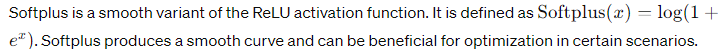

In [ ]:
# Create Softplus CNN model
model_softplus = Sequential([
    Conv2D(32, (3, 3), activation='softplus', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='softplus'),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_softplus.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_softplus.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 39s 91ms/step - loss: 2.4075 - accuracy: 0.1186 - val_loss: 2.2428 - val_accuracy: 0.2017
Epoch 2/10
422/422 [==============================] - 33s 78ms/step - loss: 1.1491 - accuracy: 0.5920 - val_loss: 0.4045 - val_accuracy: 0.8815
Epoch 3/10
422/422 [==============================] - 35s 82ms/step - loss: 0.4395 - accuracy: 0.8693 - val_loss: 0.3332 - val_accuracy: 0.9033
Epoch 4/10
422/422 [==============================] - 35s 82ms/step - loss: 0.3904 - accuracy: 0.8863 - val_loss: 0.3069 - val_accuracy: 0.9115
Epoch 5/10
422/422 [==============================] - 34s 81ms/step - loss: 0.3544 - accuracy: 0.8969 - val_loss: 0.2730 - val_accuracy: 0.9198
Epoch 6/10
422/422 [==============================] - 34s 80ms/step - loss: 0.3155 - accuracy: 0.9082 - val_loss: 0.2394 - val_accuracy: 0.9303
Epoch 7/10
422/422 [==============================] - 34s 81ms/step - loss: 0.2743 - accuracy: 0.9198 - val_loss: 0.2056 - val_accuracy:

#8. Softsign

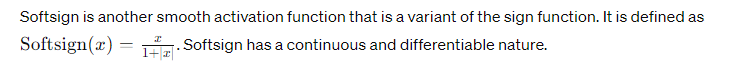

In [ ]:
# Create Softsign CNN model
model_softsign = Sequential([
    Conv2D(32, (3, 3), activation='softsign', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='softsign'),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_softsign.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_softsign.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 26s 60ms/step - loss: 0.2853 - accuracy: 0.9188 - val_loss: 0.1208 - val_accuracy: 0.9678
Epoch 2/10
422/422 [==============================] - 26s 61ms/step - loss: 0.1108 - accuracy: 0.9690 - val_loss: 0.0804 - val_accuracy: 0.9760
Epoch 3/10
422/422 [==============================] - 24s 57ms/step - loss: 0.0709 - accuracy: 0.9802 - val_loss: 0.0613 - val_accuracy: 0.9837
Epoch 4/10
422/422 [==============================] - 25s 59ms/step - loss: 0.0511 - accuracy: 0.9859 - val_loss: 0.0522 - val_accuracy: 0.9848
Epoch 5/10
422/422 [==============================] - 24s 58ms/step - loss: 0.0380 - accuracy: 0.9899 - val_loss: 0.0490 - val_accuracy: 0.9867
Epoch 6/10
422/422 [==============================] - 24s 56ms/step - loss: 0.0283 - accuracy: 0.9926 - val_loss: 0.0512 - val_accuracy: 0.9860
Epoch 7/10
422/422 [==============================] - 24s 57ms/step - loss: 0.0217 - accuracy: 0.9951 - val_loss: 0.0557 - val_accuracy:

#9. GELU (Gaussian Error Linear Unit)

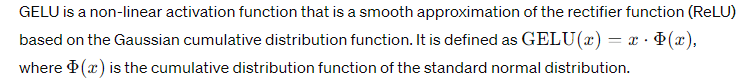

In [ ]:
# Define GELU activation function
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

# Create GELU CNN model
model_gelu = Sequential([
    Conv2D(32, (3, 3), activation=gelu, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation=gelu),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_gelu.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gelu.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 43s 100ms/step - loss: 0.2629 - accuracy: 0.9241 - val_loss: 0.0854 - val_accuracy: 0.9768
Epoch 2/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0789 - accuracy: 0.9769 - val_loss: 0.0636 - val_accuracy: 0.9828
Epoch 3/10
422/422 [==============================] - 42s 100ms/step - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.0519 - val_accuracy: 0.9868
Epoch 4/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0556 - val_accuracy: 0.9855
Epoch 5/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0478 - val_accuracy: 0.9867
Epoch 6/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0511 - val_accuracy: 0.9883
Epoch 7/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0475 - val_accurac

#10. Mish

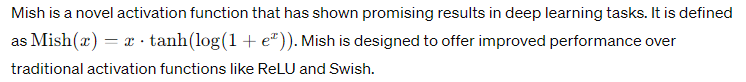

In [ ]:
# Define Mish activation function
def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

# Create Mish CNN model
model_mish = Sequential([
    Conv2D(32, (3, 3), activation=mish, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation=mish),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_mish.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mish.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 42s 98ms/step - loss: 0.2738 - accuracy: 0.9225 - val_loss: 0.1006 - val_accuracy: 0.9733
Epoch 2/10
422/422 [==============================] - 47s 111ms/step - loss: 0.0865 - accuracy: 0.9737 - val_loss: 0.0619 - val_accuracy: 0.9840
Epoch 3/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0557 - val_accuracy: 0.9865
Epoch 4/10
422/422 [==============================] - 43s 101ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0522 - val_accuracy: 0.9857
Epoch 5/10
422/422 [==============================] - 43s 102ms/step - loss: 0.0270 - accuracy: 0.9921 - val_loss: 0.0519 - val_accuracy: 0.9868
Epoch 6/10
422/422 [==============================] - 41s 98ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0560 - val_accuracy: 0.9870
Epoch 7/10
422/422 [==============================] - 41s 98ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0506 - val_accur

#11. ISRU (Inverse Square Root Unit)

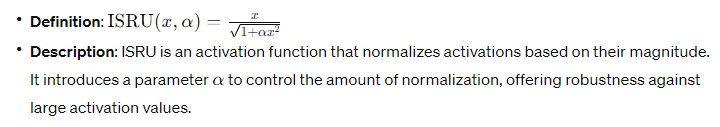

In [ ]:
# Define ISRU activation function
def isru(x, alpha=1.0):
    return x / tf.sqrt(1 + alpha * tf.square(x))

# Create ISRU CNN model
model_isru = Sequential([
    Conv2D(32, (3, 3), activation=isru, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation=isru),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_isru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_isru.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 39s 91ms/step - loss: 0.2486 - accuracy: 0.9271 - val_loss: 0.1074 - val_accuracy: 0.9703
Epoch 2/10
422/422 [==============================] - 34s 81ms/step - loss: 0.0974 - accuracy: 0.9721 - val_loss: 0.0762 - val_accuracy: 0.9795
Epoch 3/10
422/422 [==============================] - 35s 83ms/step - loss: 0.0635 - accuracy: 0.9817 - val_loss: 0.0634 - val_accuracy: 0.9833
Epoch 4/10
422/422 [==============================] - 35s 84ms/step - loss: 0.0432 - accuracy: 0.9885 - val_loss: 0.0594 - val_accuracy: 0.9850
Epoch 5/10
422/422 [==============================] - 37s 87ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.0563 - val_accuracy: 0.9840
Epoch 6/10
422/422 [==============================] - 37s 89ms/step - loss: 0.0219 - accuracy: 0.9948 - val_loss: 0.0498 - val_accuracy: 0.9860
Epoch 7/10
422/422 [==============================] - 37s 87ms/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.0480 - val_accuracy:

#12. ELiSH (Exponential Linear Sigmoid SquasHing)

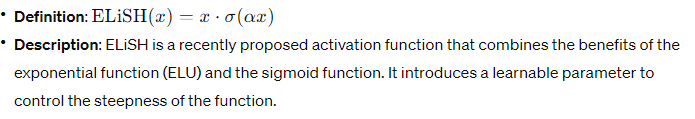

In [ ]:
# Define ELiSH activation function
def elish(x, alpha=1.0):
    return x * tf.nn.sigmoid(alpha * x)

# Create ELiSH CNN model
model_elish = Sequential([
    Conv2D(32, (3, 3), activation=elish, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation=elish),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_elish.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_elish.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 34s 77ms/step - loss: 0.2978 - accuracy: 0.9144 - val_loss: 0.0988 - val_accuracy: 0.9747
Epoch 2/10
422/422 [==============================] - 31s 74ms/step - loss: 0.0903 - accuracy: 0.9736 - val_loss: 0.0663 - val_accuracy: 0.9835
Epoch 3/10
422/422 [==============================] - 32s 77ms/step - loss: 0.0531 - accuracy: 0.9840 - val_loss: 0.0590 - val_accuracy: 0.9848
Epoch 4/10
422/422 [==============================] - 30s 72ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0582 - val_accuracy: 0.9858
Epoch 5/10
422/422 [==============================] - 32s 76ms/step - loss: 0.0282 - accuracy: 0.9919 - val_loss: 0.0498 - val_accuracy: 0.9868
Epoch 6/10
422/422 [==============================] - 30s 72ms/step - loss: 0.0206 - accuracy: 0.9942 - val_loss: 0.0505 - val_accuracy: 0.9862
Epoch 7/10
422/422 [==============================] - 30s 72ms/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.0515 - val_accuracy:

#13. Hard Swish

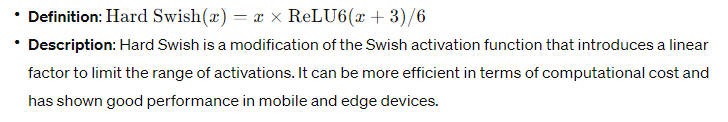

In [ ]:
# Define Hard Swish activation function
def hard_swish(x):
    return x * tf.nn.relu6(x + 3) / 6

# Create Hard Swish CNN model
model_hard_swish = Sequential([
    Conv2D(32, (3, 3), activation=hard_swish, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation=hard_swish),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_hard_swish.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_hard_swish.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 38s 87ms/step - loss: 0.3085 - accuracy: 0.9139 - val_loss: 0.1091 - val_accuracy: 0.9715
Epoch 2/10
422/422 [==============================] - 33s 78ms/step - loss: 0.0978 - accuracy: 0.9708 - val_loss: 0.0709 - val_accuracy: 0.9815
Epoch 3/10
422/422 [==============================] - 32s 76ms/step - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.0549 - val_accuracy: 0.9848
Epoch 4/10
422/422 [==============================] - 35s 83ms/step - loss: 0.0426 - accuracy: 0.9873 - val_loss: 0.0567 - val_accuracy: 0.9852
Epoch 5/10
422/422 [==============================] - 33s 77ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0708 - val_accuracy: 0.9818
Epoch 6/10
422/422 [==============================] - 31s 74ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0513 - val_accuracy: 0.9870
Epoch 7/10
422/422 [==============================] - 31s 73ms/step - loss: 0.0156 - accuracy: 0.9956 - val_loss: 0.0548 - val_accuracy:

#14. SQNL (Squared Non-Linearity)

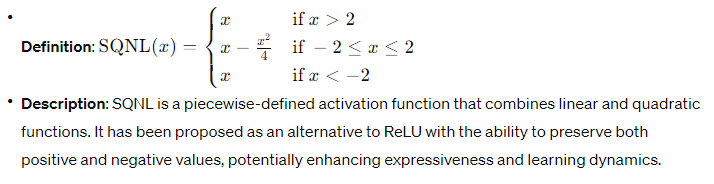

In [ ]:
# Define SQNL activation function
def sqnl(x):
    return tf.where(x > 2, x,
                    tf.where(x >= -2, x - 0.25 * tf.square(x),
                             x))

# Create SQNL CNN model
model_sqnl = Sequential([
    Conv2D(32, (3, 3), activation=sqnl, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation=sqnl),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_sqnl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_sqnl.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 47s 108ms/step - loss: 0.2538 - accuracy: 0.9263 - val_loss: 0.1060 - val_accuracy: 0.9703
Epoch 2/10
422/422 [==============================] - 46s 109ms/step - loss: 0.1042 - accuracy: 0.9693 - val_loss: 0.0931 - val_accuracy: 0.9732
Epoch 3/10
422/422 [==============================] - 49s 115ms/step - loss: 0.0753 - accuracy: 0.9766 - val_loss: 0.0766 - val_accuracy: 0.9780
Epoch 4/10
422/422 [==============================] - 49s 117ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0771 - val_accuracy: 0.9783
Epoch 5/10
422/422 [==============================] - 45s 107ms/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0710 - val_accuracy: 0.9793
Epoch 6/10
422/422 [==============================] - 47s 112ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0804 - val_accuracy: 0.9790
Epoch 7/10
422/422 [==============================] - 46s 110ms/step - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0736 - val_ac

#15. SineReLU

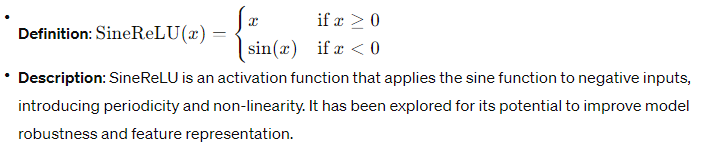

In [ ]:
# Define SineReLU activation function
def sinereLU(x):
    return tf.where(x >= 0, x, tf.math.sin(x))

# Create SineReLU CNN model
model_sinereLU = Sequential([
    Conv2D(32, (3, 3), activation=sinereLU, input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation=sinereLU),
    Dense(num_classes, activation='softmax')
])

# Compile and train the model
model_sinereLU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_sinereLU.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 39s 91ms/step - loss: 0.2436 - accuracy: 0.9271 - val_loss: 0.0910 - val_accuracy: 0.9748
Epoch 2/10
422/422 [==============================] - 37s 89ms/step - loss: 0.0795 - accuracy: 0.9767 - val_loss: 0.0622 - val_accuracy: 0.9827
Epoch 3/10
422/422 [==============================] - 37s 88ms/step - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0574 - val_accuracy: 0.9840
Epoch 4/10
422/422 [==============================] - 38s 89ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0557 - val_accuracy: 0.9842
Epoch 5/10
422/422 [==============================] - 39s 92ms/step - loss: 0.0176 - accuracy: 0.9952 - val_loss: 0.0505 - val_accuracy: 0.9865
Epoch 6/10
422/422 [==============================] - 37s 89ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.0575 - val_accuracy: 0.9858
Epoch 7/10
422/422 [==============================] - 36s 86ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.0519 - val_accuracy: